# Data preparation for clustering

For clustering using the k-means method we will need to follow a few steps:
* **Normalise the data:** The process of converting an actual range of values into a standard range of values
* **Find a Similarity Measure:**
* **Interpret Results:**

In [1]:
import pandas as pd
import numpy as np

Importing cleaned data

In [2]:
all_data = pd.read_csv('data/all_data.csv')
all_data=all_data.drop(["Unnamed: 0"], axis=1) # Drop Unnamed: 0 column
all_data.head()

,Total,Study_Type,No_participants,Amount_won,Amount_lost,1,2,3,4
0,1150,Fridberg,95,5800,-4650,12.0,9.0,3.0,71.0
1,-675,Fridberg,95,7250,-7925,24.0,26.0,12.0,33.0
2,-750,Fridberg,95,7100,-7850,12.0,35.0,10.0,38.0
3,-525,Fridberg,95,7000,-7525,11.0,34.0,12.0,38.0
4,100,Fridberg,95,6450,-6350,10.0,24.0,15.0,46.0


get_dummies is a data manipulation function used to convert categorical data into indicator variables

:::{note}
Machine learning models require all input and output variables to be numeric
:::

In [3]:
all_data = pd.get_dummies(all_data, columns=["Study_Type"])

In [4]:
all_data.head()

,Total,No_participants,Amount_won,Amount_lost,1,2,3,4,Study_Type_Fridberg,Study_Type_Horstmann,Study_Type_Kjome,Study_Type_Maia,Study_Type_Premkumar,Study_Type_Steingroever2011,Study_Type_SteingroverInPrep,Study_Type_Wetzels,Study_Type_Wood,Study_Type_Worthy
0,1150,95,5800,-4650,12.0,9.0,3.0,71.0,1,0,0,0,0,0,0,0,0,0
1,-675,95,7250,-7925,24.0,26.0,12.0,33.0,1,0,0,0,0,0,0,0,0,0
2,-750,95,7100,-7850,12.0,35.0,10.0,38.0,1,0,0,0,0,0,0,0,0,0
3,-525,95,7000,-7525,11.0,34.0,12.0,38.0,1,0,0,0,0,0,0,0,0,0
4,100,95,6450,-6350,10.0,24.0,15.0,46.0,1,0,0,0,0,0,0,0,0,0


### Normalizing data

As for K-means, often it is not sufficient to normalize only mean. One normalizes data equalizing variance along different features as K-means is sensitive to variance in data, and features with larger variance have more emphasis on result. So for K-means, I would recommend using StandardScaler for data preprocessing.

Don't forget also that k-means results are sensitive to the order of observations, and it is worth to run algorithm several times, shuffling data in between, averaging resulting clusters and running final evaluations with those averaged clusters centers as starting points.

Normalizing data is a common step for data preparation for clustering

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
all_data[['Total', 'Amount_won', 'Amount_lost', '1', '2', '3', '4']] = scaler.fit_transform(all_data[['Total', 'Amount_won', 'Amount_lost', '1', '2', '3', '4']])

In [6]:
all_data.head()

,Total,No_participants,Amount_won,Amount_lost,1,2,3,4,Study_Type_Fridberg,Study_Type_Horstmann,Study_Type_Kjome,Study_Type_Maia,Study_Type_Premkumar,Study_Type_Steingroever2011,Study_Type_SteingroverInPrep,Study_Type_Wetzels,Study_Type_Wood,Study_Type_Worthy
0,0.675000,95,0.052910,0.880249,0.250000,0.062937,0.013423,0.525926,1,0,0,0,0,0,0,0,0,0
1,0.446875,95,0.206349,0.676516,0.500000,0.181818,0.073826,0.244444,1,0,0,0,0,0,0,0,0,0
2,0.437500,95,0.190476,0.681182,0.250000,0.244755,0.060403,0.281481,1,0,0,0,0,0,0,0,0,0
3,0.465625,95,0.179894,0.701400,0.229167,0.237762,0.073826,0.281481,1,0,0,0,0,0,0,0,0,0
4,0.543750,95,0.121693,0.774495,0.208333,0.167832,0.093960,0.340741,1,0,0,0,0,0,0,0,0,0


In [7]:
normalise_data = all_data
normalise_data.head(1)

,Total,No_participants,Amount_won,Amount_lost,1,2,3,4,Study_Type_Fridberg,Study_Type_Horstmann,Study_Type_Kjome,Study_Type_Maia,Study_Type_Premkumar,Study_Type_Steingroever2011,Study_Type_SteingroverInPrep,Study_Type_Wetzels,Study_Type_Wood,Study_Type_Worthy
0,0.675,95,0.05291,0.880249,0.25,0.062937,0.013423,0.525926,1,0,0,0,0,0,0,0,0,0


### Elbow Method

In [8]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(normalise_data)
    distortions.append(kmeanModel.inertia_)

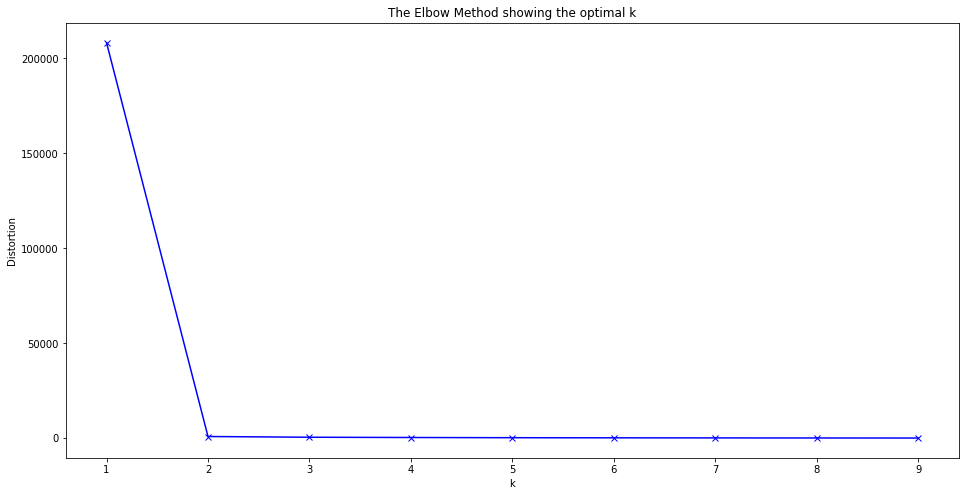

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()